<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/ModernPortfolioTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 577 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 3.9 MB/s 


In [3]:
import yfinance as yf
import pandas as pd 
import numpy as np 

In [317]:
tick = 'AAPL', 'META', 'MSFT', 'PYPL', 'GOOG', 'NFLX', 'TSLA', 'XOM', 'CVS','IBM', 'V', 'AVGO','QCOM','AMZN','MA', 'BMY', 'PFE', 'MAR', 'BKNG', 'FTNT', 'SE', 'ADBE', 'MRNA','AMGN', 'TAP', 'SBUX', 'MCD', 'CMG', 'WM', 'AXP', 'KO', 'PEP', 'AMD', 'NVDA', 'TSM', 'QUAL', 'MU', 'LRCX', 'CRM', 'O', 'SPY', 'DPZ', 'WMT', 'COST', 'HD', 'LOW', 'TGT', 'BA', 'GSK', 'BP', 'JNJ', 'PG', 'MO', 'JPM', 'BAC', 'WFC', 'INTC', 'SHOP', 'SPOT', 'QQQ', 'MMM', 'LMT', 'VZ', 'T', 'GS', 'MRK', 'TJX', 'DOCU', 'MELI', 'CVX', 'SQ', 'ABBV', 'NKE', 'ABT', 'ATVI', 'EA', 'CLX', 'CSCO', 'PANW', 'C', 'MKC', 'NEE', 'DUK', 'LLY', 'UNH', 'ALGN', 'YUM', 'DIS', 'PARA' 
#Show the data
df = yf.download(tick, start = '2017-8-3', end = '2022-8-3')
df = df['Adj Close']

df

[*********************100%***********************]  89 of 89 completed


,AAPL,ABBV,ABT,ADBE,ALGN,AMD,AMGN,AMZN,ATVI,AVGO,...,TSLA,TSM,UNH,V,VZ,WFC,WM,WMT,XOM,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-03,36.818214,56.459969,45.271370,147.789993,170.460007,13.240000,150.409805,49.346001,62.051155,208.410049,...,69.417999,31.295744,180.854904,97.401573,38.875118,46.516354,68.851845,73.551552,61.815872,68.900482
2017-08-04,37.012280,56.459969,45.363461,147.710007,169.300003,13.120000,150.124832,49.379002,60.149948,207.477509,...,71.382004,31.505604,180.957047,97.692070,39.115040,46.028538,68.760773,73.196861,61.600842,69.056938
2017-08-07,37.585018,56.642891,45.400295,148.440002,174.009995,13.430000,150.755249,49.613499,60.634953,210.200317,...,71.033997,32.170174,180.864166,98.273041,39.075047,45.767208,68.642418,73.924454,61.562424,69.020119
2017-08-08,37.885578,56.841721,45.013519,147.809998,173.619995,13.110000,149.986725,49.492001,59.490353,209.301056,...,73.043999,32.091469,180.975616,98.069702,38.867119,45.915298,68.596878,74.206398,61.408833,68.292992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,156.789993,151.149994,109.989998,392.779999,262.609985,89.820000,251.720001,120.970001,79.790001,527.789978,...,824.460022,87.629997,534.609985,210.470001,44.910000,43.709999,159.300003,126.589996,91.570000,120.510002
2022-07-28,157.350006,149.750000,110.360001,403.500000,282.250000,91.669998,249.750000,122.279999,79.510002,533.609985,...,842.700012,88.610001,541.489990,211.350006,45.549999,43.320000,164.570007,129.750000,92.639999,122.709999
2022-07-29,162.509995,143.509995,108.839996,410.119995,280.970001,94.470001,247.470001,134.949997,79.949997,535.479980,...,891.450012,88.480003,542.340027,212.110001,46.189999,43.869999,164.559998,132.050003,96.930000,122.540001


In [318]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

In [319]:
mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()

In [320]:
mu

AAPL    0.342522
ABBV    0.200350
ABT     0.191831
ADBE    0.226961
ALGN    0.105584
          ...   
WFC    -0.016186
WM      0.189075
WMT     0.125551
XOM     0.087821
YUM     0.121602
Length: 89, dtype: float64

In [321]:
S

,AAPL,ABBV,ABT,ADBE,ALGN,AMD,AMGN,AMZN,ATVI,AVGO,...,TSLA,TSM,UNH,V,VZ,WFC,WM,WMT,XOM,YUM
AAPL,0.103753,0.031529,0.043864,0.075464,0.077237,0.093814,0.036267,0.068940,0.047264,0.072510,...,0.091950,0.060666,0.045481,0.056614,0.016282,0.046023,0.028508,0.026646,0.034675,0.035325
ABBV,0.031529,0.083010,0.034179,0.035588,0.045831,0.039150,0.035125,0.025117,0.026562,0.033587,...,0.031725,0.024221,0.039662,0.034624,0.019101,0.034668,0.024500,0.016749,0.030238,0.022266
ABT,0.043864,0.034179,0.069543,0.049867,0.062328,0.059166,0.035596,0.037489,0.032004,0.043528,...,0.045956,0.034246,0.043327,0.041577,0.019804,0.034686,0.028884,0.021833,0.023456,0.029393
ADBE,0.075464,0.035588,0.049867,0.129280,0.090182,0.106184,0.037580,0.079697,0.058587,0.073804,...,0.099837,0.062171,0.045478,0.063386,0.013564,0.041139,0.029918,0.027742,0.025971,0.035775
ALGN,0.077237,0.045831,0.062328,0.090182,0.269290,0.124146,0.042142,0.072728,0.045489,0.089280,...,0.112551,0.077726,0.061658,0.074677,0.020099,0.070010,0.041833,0.022222,0.055013,0.057793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WFC,0.046023,0.034668,0.034686,0.041139,0.070010,0.055997,0.033329,0.032963,0.018007,0.053559,...,0.054641,0.046176,0.047282,0.056592,0.026828,0.135582,0.039191,0.021752,0.070770,0.043473
WM,0.028508,0.024500,0.028884,0.029918,0.041833,0.031088,0.024101,0.019151,0.015987,0.029907,...,0.022232,0.021381,0.033791,0.032779,0.020416,0.039191,0.049492,0.019221,0.029077,0.025777
WMT,0.026646,0.016749,0.021833,0.027742,0.022222,0.028629,0.021904,0.023016,0.019356,0.021540,...,0.022261,0.019916,0.023352,0.019896,0.017293,0.021752,0.019221,0.056294,0.015403,0.013436
XOM,0.034675,0.030238,0.023456,0.025971,0.055013,0.042513,0.024947,0.023119,0.018023,0.046118,...,0.040812,0.036827,0.039091,0.044734,0.021445,0.070770,0.029077,0.015403,0.107423,0.034579


In [322]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()


In [323]:
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.txt")  # saves to file
cleaned_weights

OrderedDict([('AAPL', 0.0),
             ('ABBV', 0.0),
             ('ABT', 0.0),
             ('ADBE', 0.0),
             ('ALGN', 0.0),
             ('AMD', 0.0),
             ('AMGN', 0.0),
             ('AMZN', 0.0),
             ('ATVI', 0.0),
             ('AVGO', 0.0),
             ('AXP', 0.0),
             ('BA', 0.0),
             ('BAC', 0.0),
             ('BKNG', 0.0),
             ('BMY', 0.0),
             ('BP', 0.0),
             ('C', 0.0),
             ('CLX', 0.0),
             ('CMG', 0.05102),
             ('COST', 0.26118),
             ('CRM', 0.0),
             ('CSCO', 0.0),
             ('CVS', 0.0),
             ('CVX', 0.0),
             ('DIS', 0.0),
             ('DOCU', 0.0),
             ('DPZ', 0.0),
             ('DUK', 0.0),
             ('EA', 0.0),
             ('FTNT', 0.13505),
             ('GOOG', 0.0),
             ('GS', 0.0),
             ('GSK', 0.0),
             ('HD', 0.0),
             ('IBM', 0.0),
             ('INTC', 0.0),
        

In [324]:
ef.portfolio_performance(verbose=True)

Expected annual return: 46.7%
Annual volatility: 24.3%
Sharpe Ratio: 1.84


(0.4665809485166398, 0.24326067860371423, 1.8358123108097797)

In [325]:
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

In [326]:
ef = EfficientFrontier(mu, S)
ef.tickers

['AAPL',
 'ABBV',
 'ABT',
 'ADBE',
 'ALGN',
 'AMD',
 'AMGN',
 'AMZN',
 'ATVI',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BKNG',
 'BMY',
 'BP',
 'C',
 'CLX',
 'CMG',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DIS',
 'DOCU',
 'DPZ',
 'DUK',
 'EA',
 'FTNT',
 'GOOG',
 'GS',
 'GSK',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'LLY',
 'LMT',
 'LOW',
 'LRCX',
 'MA',
 'MAR',
 'MCD',
 'MELI',
 'META',
 'MKC',
 'MMM',
 'MO',
 'MRK',
 'MRNA',
 'MSFT',
 'MU',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'O',
 'PANW',
 'PARA',
 'PEP',
 'PFE',
 'PG',
 'PYPL',
 'QCOM',
 'QQQ',
 'QUAL',
 'SBUX',
 'SE',
 'SHOP',
 'SPOT',
 'SPY',
 'SQ',
 'T',
 'TAP',
 'TGT',
 'TJX',
 'TSLA',
 'TSM',
 'UNH',
 'V',
 'VZ',
 'WFC',
 'WM',
 'WMT',
 'XOM',
 'YUM']

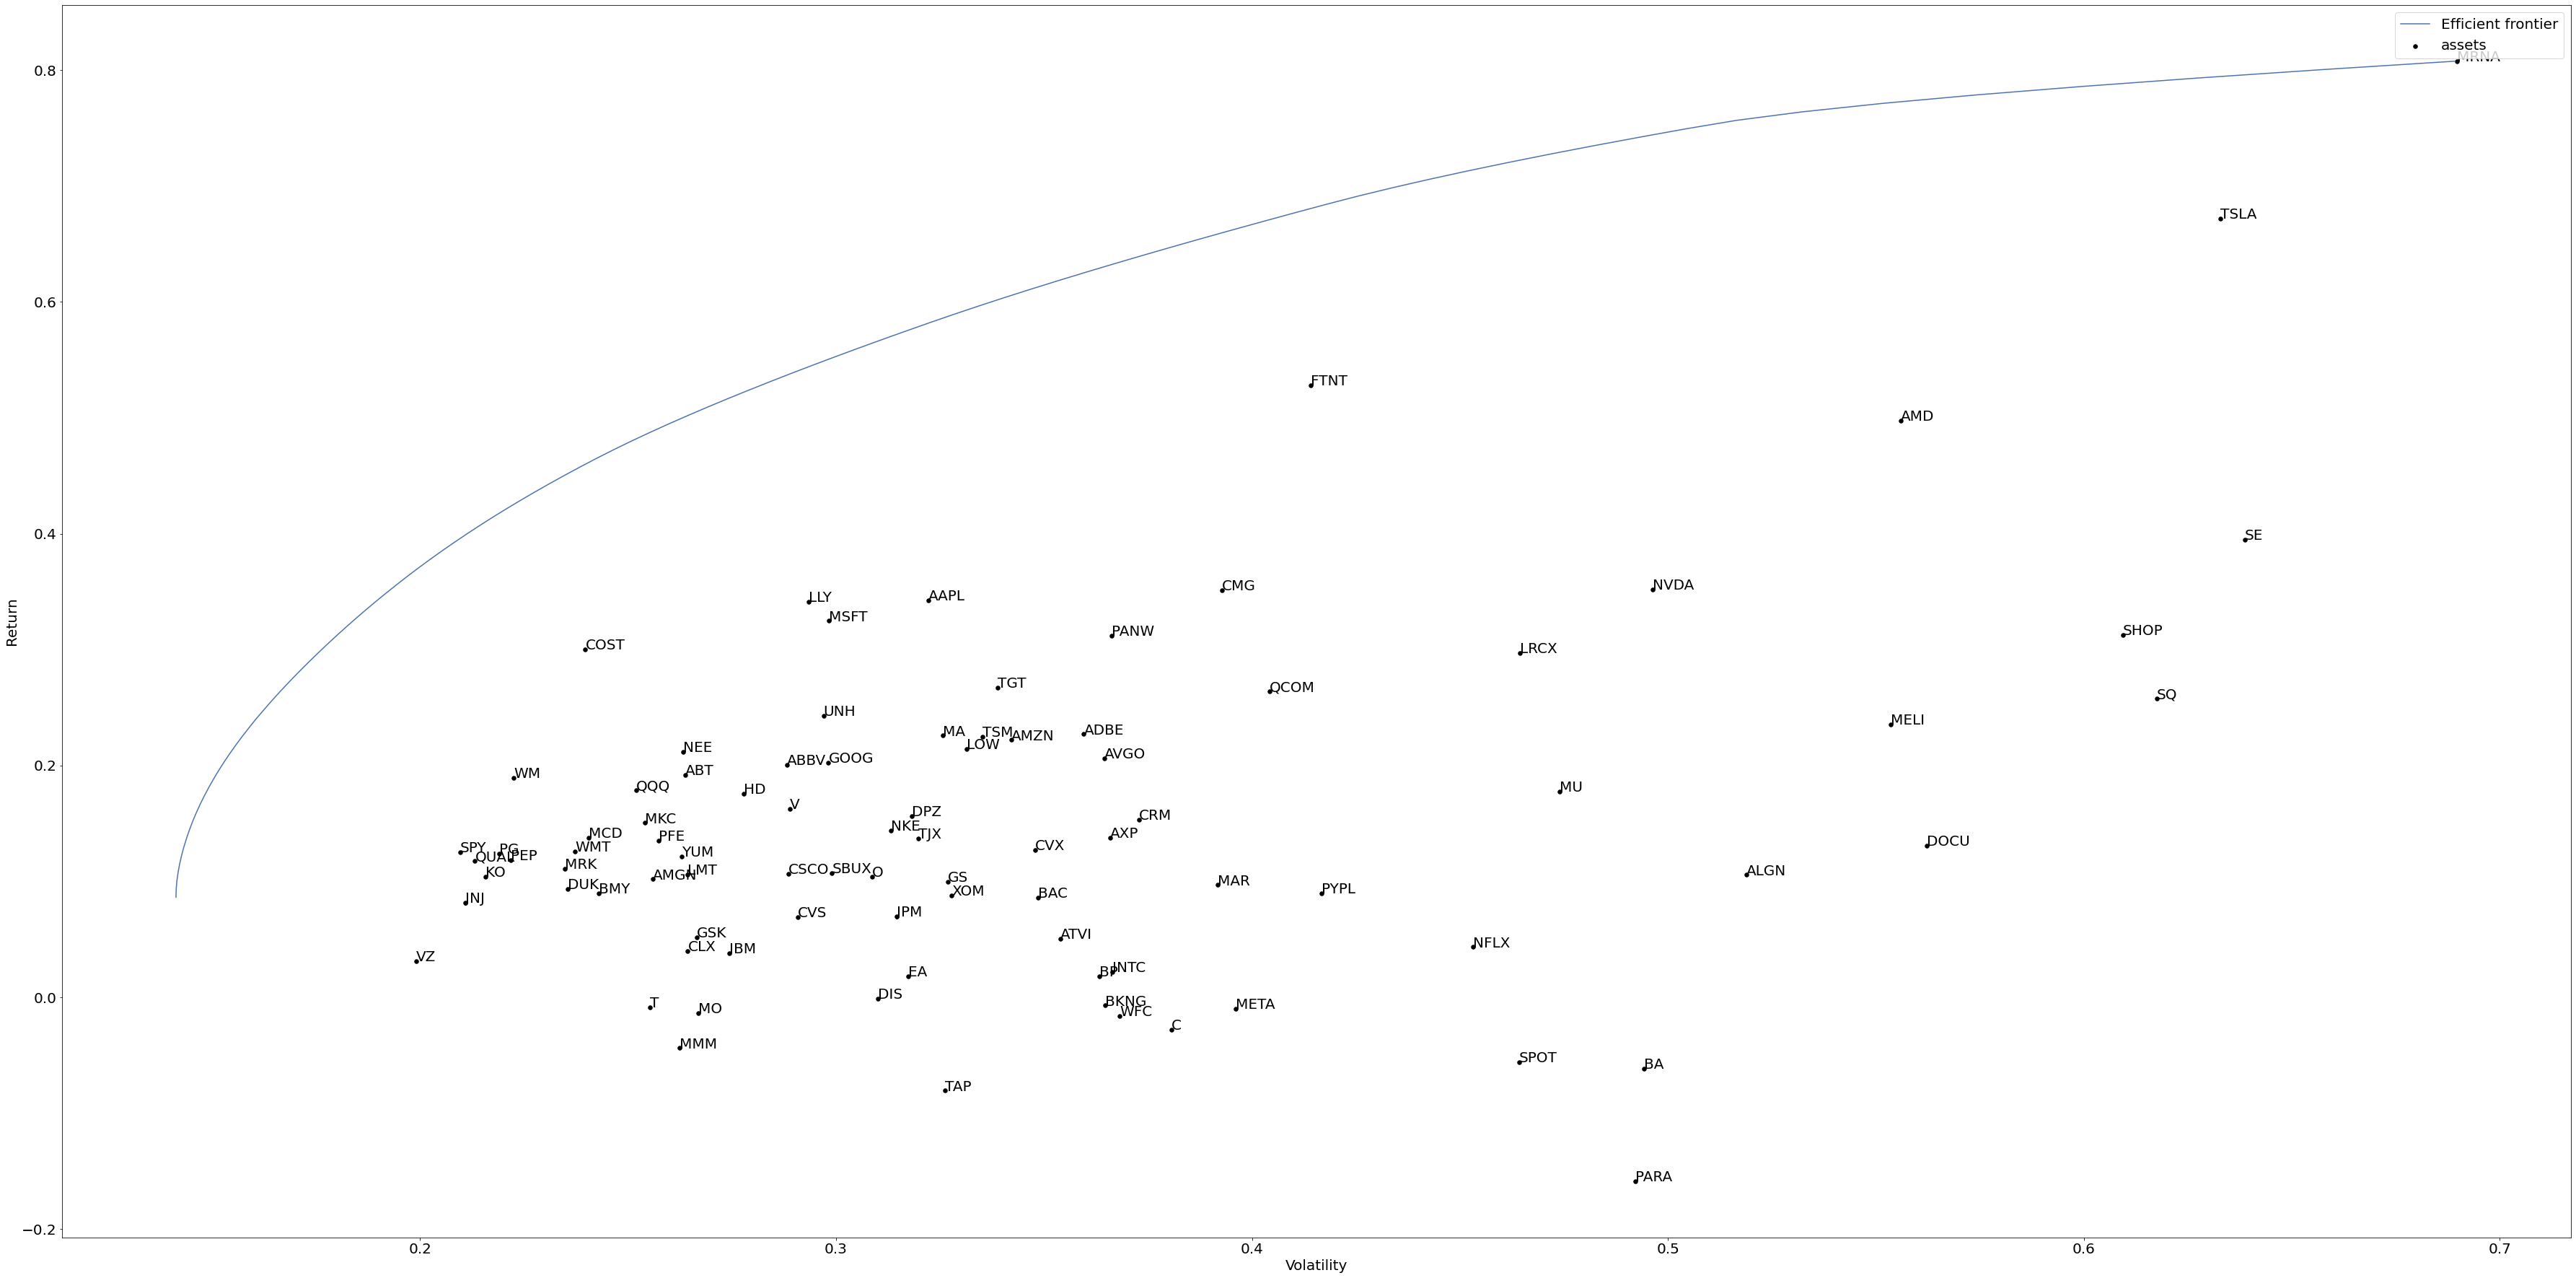

In [327]:
fig, ax = plt.subplots(figsize =(50,25))
plt.rcParams.update({'font.size': 20})
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, c='DarkBlue')
for i, txt in enumerate(ef.tickers):
  ax.annotate(txt, ((np.diag(ef.cov_matrix) ** (1/2))[i], ef.expected_returns[i]))

In [328]:
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.2)
w = ef.max_sharpe()
ef.clean_weights()

/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


OrderedDict([('AAPL', 0.04154),
             ('ABBV', 0.03176),
             ('ABT', 0.0),
             ('ADBE', 0.0),
             ('ALGN', 0.0),
             ('AMD', 0.03212),
             ('AMGN', 0.0),
             ('AMZN', 0.0),
             ('ATVI', 0.0),
             ('AVGO', 0.0),
             ('AXP', 0.0),
             ('BA', 0.0),
             ('BAC', 0.0),
             ('BKNG', 0.0),
             ('BMY', 0.0),
             ('BP', 0.0),
             ('C', 0.0),
             ('CLX', 0.0),
             ('CMG', 0.06012),
             ('COST', 0.09138),
             ('CRM', 0.0),
             ('CSCO', 0.0),
             ('CVS', 0.0),
             ('CVX', 0.0),
             ('DIS', 0.0),
             ('DOCU', 0.0),
             ('DPZ', 0.0),
             ('DUK', 0.0),
             ('EA', 0.0),
             ('FTNT', 0.1148),
             ('GOOG', 0.0),
             ('GS', 0.0),
             ('GSK', 0.0),
             ('HD', 0.0),
             ('IBM', 0.0),
             ('INTC', 0.0

In [329]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(w, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
allocation

{'AAPL': 3,
 'ABBV': 3,
 'AMD': 3,
 'COST': 2,
 'FTNT': 19,
 'LLY': 4,
 'MKC': 1,
 'MRNA': 11,
 'MSFT': 1,
 'NEE': 4,
 'PANW': 1,
 'T': 2,
 'TGT': 3,
 'TSLA': 1,
 'UNH': 1,
 'WM': 2}